<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of train/test validation methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can the training and testing validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Fold cross-validation:**
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different K-splits of the data for the same models.

If you're interested, try a variety of response variables.  We start with **MEDV** (the `.target` attribute from the dataset load method).

In [139]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [140]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing() #using California housing data because of ethics issues with Boston data

X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target
#boston = load_boston()

In [141]:
print(housing.keys())
housing.DESCR

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [142]:
# A:
print(X.head())
print(X.columns)
print(X.dtypes)
print(X.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  

In [144]:
#Data in columns looks reasonable

### 1. Clean up any data problems

Load the Boston housing data.  Fix any problems, if applicable.

In [145]:
# A: no missing data
X.isnull().sum().sort_values(ascending=False)

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

### 2. Select 3-4 variables with your dataset to perform a 50/50 test train split on

- Use sklearn.
- Score and plot your predictions.

In [157]:
y_df = pd.DataFrame(y, columns=["MedHouseValue"])
df = pd.concat([X, y_df], axis=1)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [161]:
corr = df.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseValue,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


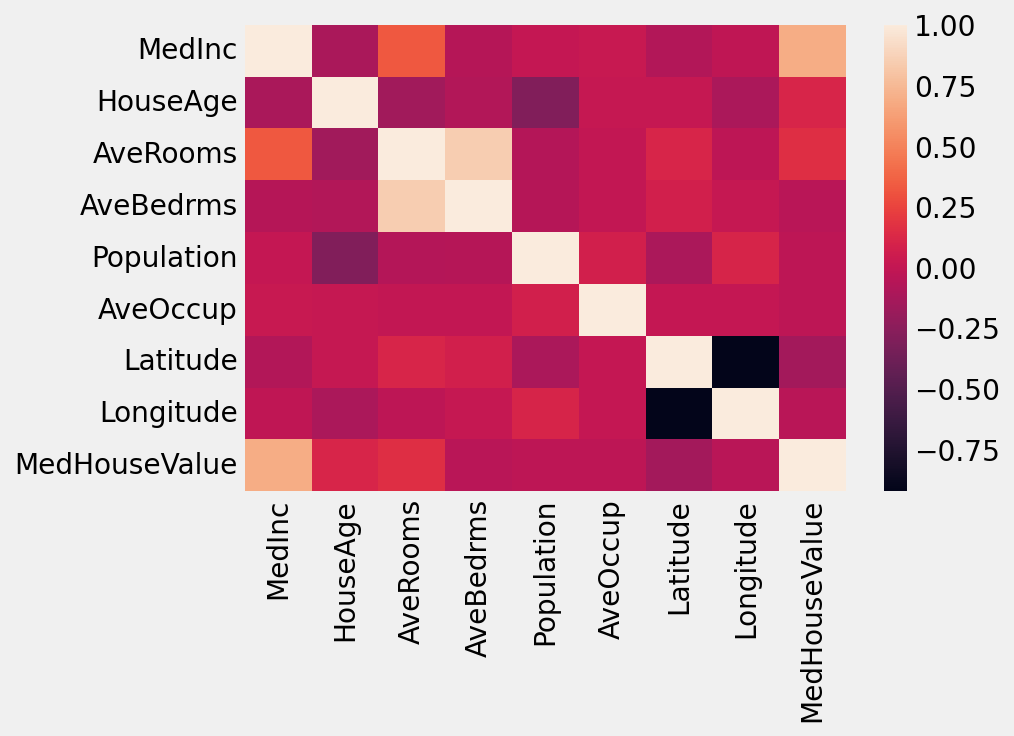

In [162]:
sns.heatmap(corr);

In [166]:
# A: note: AveBedrms is not highly correlated with my target variable, but removing it decreased my score significantly
predictors = ['AveRooms', 'AveBedrms', 'MedInc', 'HouseAge']

X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, train_size=0.5, random_state=8)


lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.5399650329502999

In [147]:
print(lr.intercept_)
print(lr.coef_)

-0.33259355502074817
[-0.19756697  0.91919953  0.52559899  0.01541146]


In [148]:
coeffs = pd.DataFrame(list(zip(X.columns, lr.coef_)), columns=['feature', 'coefficient'])
coeffs=coeffs.set_index('feature', drop=True)
coeffs

,coefficient
feature,
MedInc,-0.197567
HouseAge,0.919200
AveRooms,0.525599
AveBedrms,0.015411


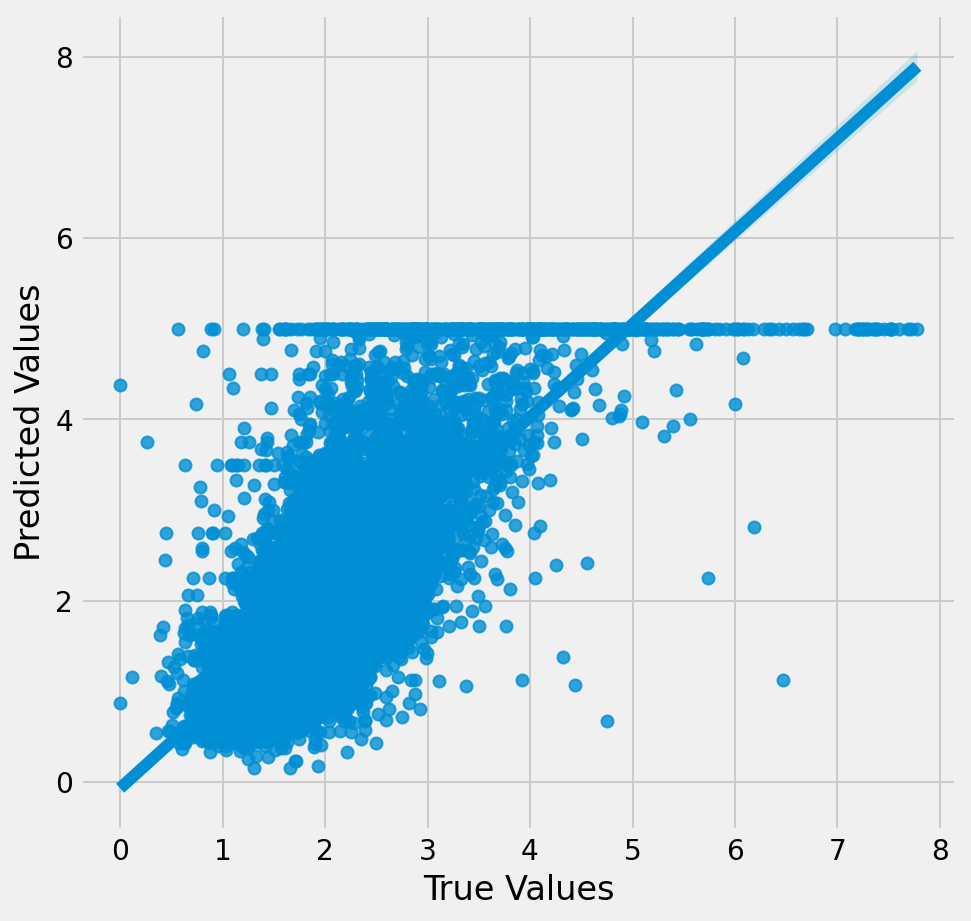

In [168]:
ypred = lr.predict(X_test)
plt.figure(figsize=(7,7))
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
fig=sns.regplot(x=ypred, y=y_test)
plt.show(fig)

### 3. Try 70/30 and 90/10
- Score and plot.  
- How do your metrics change?

In [150]:
# A:
X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, train_size=0.7, random_state=8)


lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.5346483651379534

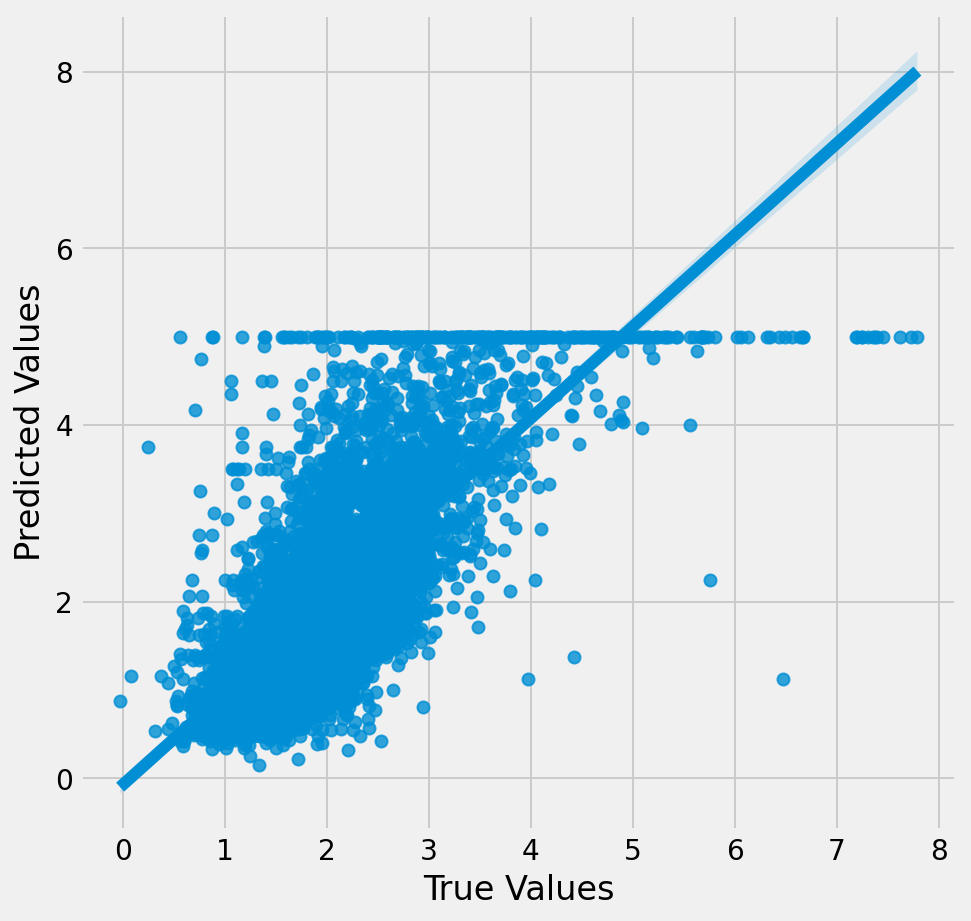

In [151]:
ypred = lr.predict(X_test)
plt.figure(figsize=(7,7))
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
fig=sns.regplot(x=ypred, y=y_test)
plt.show(fig)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, train_size=0.9, random_state=8)


lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.5613247667681429

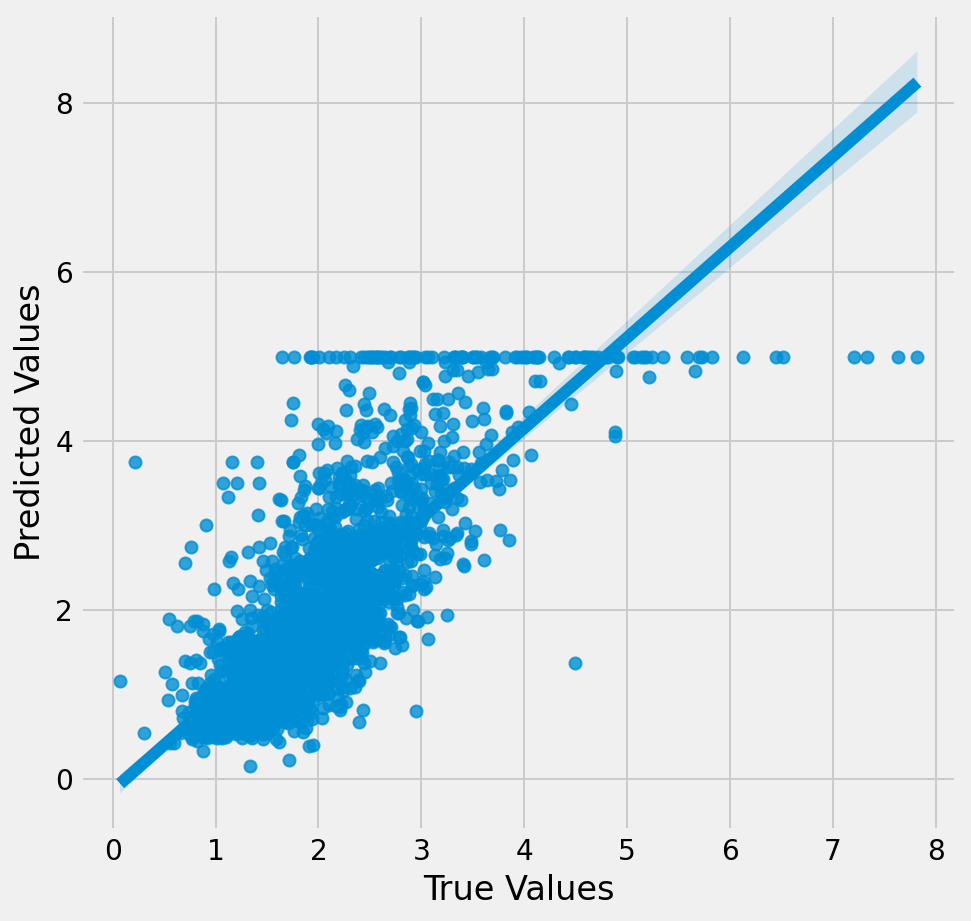

In [153]:
ypred = lr.predict(X_test)
plt.figure(figsize=(7,7))
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
fig=sns.regplot(x=ypred, y=y_test)
plt.show(fig)

### 4. Try K-Folds cross-validation with K between 5-10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What the variance of scores like?
- Try different folds to get a sense of how this impacts your score.

In [154]:
from sklearn.preprocessing import StandardScaler
# "Instantiate" the scaler (create an instance of the sklearn class)
std_scaler = StandardScaler()
std_scaler

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X[predictors], y, train_size=0.5, random_state=8)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

0.5399650329502999

In [107]:
#scaling the data produced the same score as the unscaled data

In [155]:
#kFold cross-validation
for k in range(5,11):
    print("k:",k)
    lr = LinearRegression()
    scores = cross_val_score(lr, X[predictors], y, cv=k)
    print("scores:",scores)
    lr.fit(X, y)
    y_preds = cross_val_predict(lr, X[predictors], y, cv=k)
    r2 = round(metrics.r2_score(y, y_preds),5)
    print("R2:",r2,'\n')

k: 5
scores: [0.51049072 0.43868013 0.5123008  0.45205045 0.55393208]
R2: 0.52276 

k: 6
scores: [0.39639075 0.40402165 0.52379999 0.51013838 0.44954553 0.58144272]
R2: 0.51844 

k: 7
scores: [0.46104207 0.4584386  0.54088909 0.48735143 0.28053425 0.36411859
 0.61329512]
R2: 0.52026 

k: 8
scores: [0.50352952 0.46986743 0.50949558 0.50436617 0.53708982 0.4220919
 0.30419165 0.61363276]
R2: 0.52493 

k: 9
scores: [0.51354885 0.50572013 0.44434281 0.47768151 0.54272039 0.25945619
 0.44659349 0.435823   0.50288914]
R2: 0.52479 

k: 10
scores: [0.52885538 0.47729723 0.38676354 0.48210024 0.50662664 0.5014332
 0.1746162  0.40578634 0.29987913 0.44621443]
R2: 0.51996 



In [ ]:
#The most variance is explained with k = 8